In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import cv2
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return cv2.imread(path)


In [3]:
#warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

#IMAGE_PATHS=["test1.png","test2.png"]
IMAGE_PATHS=["test3.png"]
PATH_TO_SAVED_MODEL="exported-models/my_model/saved_model"
PATH_TO_LABELS="annotations/label_map.pbtxt"
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

In [4]:
category_index

{1: {'id': 1, 'name': 'mask_weared_incorrect'},
 2: {'id': 2, 'name': 'without_mask'},
 3: {'id': 3, 'name': 'with_mask'}}

In [5]:
image_np=np.array(Image.open("test2.png").convert("RGB"))

In [6]:
image_np.shape

(400, 267, 3)

In [7]:
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

In [8]:
input_tensor

<tf.Tensor: shape=(1, 400, 267, 3), dtype=uint8, numpy=
array([[[[227, 237, 242],
         [205, 214, 218],
         [161, 169, 171],
         ...,
         [ 99,  92,  82],
         [ 96,  91,  81],
         [ 94,  88,  79]],

        [[225, 236, 241],
         [202, 213, 215],
         [157, 167, 168],
         ...,
         [ 97,  91,  80],
         [ 94,  89,  79],
         [ 92,  87,  77]],

        [[224, 235, 240],
         [199, 211, 213],
         [152, 163, 164],
         ...,
         [ 96,  89,  79],
         [ 93,  88,  77],
         [ 91,  85,  76]],

        ...,

        [[ 79,  49,  20],
         [ 80,  49,  21],
         [ 78,  47,  21],
         ...,
         [ 28,  20,  11],
         [ 28,  20,  11],
         [ 32,  24,  15]],

        [[ 94,  62,  29],
         [ 93,  60,  29],
         [ 90,  56,  27],
         ...,
         [ 28,  20,  11],
         [ 28,  20,  11],
         [ 29,  21,  12]],

        [[106,  71,  37],
         [106,  71,  37],
         [103,  68

In [9]:
detections = detect_fn(input_tensor)

In [10]:
detections

{'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>,
 'raw_detection_scores': <tf.Tensor: shape=(1, 51150, 4), dtype=float32, numpy=
 array([[[3.6585336e-03, 1.0454396e-02, 8.9446902e-03, 1.0153178e-02],
         [3.6399693e-03, 7.5772055e-03, 6.0647526e-03, 6.9492399e-03],
         [3.6710263e-03, 6.0012434e-03, 8.6555155e-03, 1.4234069e-02],
         ...,
         [2.1323459e-03, 1.2754069e-03, 4.0108762e-03, 6.6298479e-04],
         [2.0550264e-03, 3.6639555e-03, 1.1510137e-03, 3.2618049e-05],
         [2.0755550e-03, 1.6910189e-03, 2.1532479e-04, 1.0414925e-06]]],
       dtype=float32)>,
 'raw_detection_boxes': <tf.Tensor: shape=(1, 51150, 4), dtype=float32, numpy=
 array([[[-0.0048591 , -0.00305132,  0.03059809,  0.02597491],
         [-0.03144794, -0.01911641,  0.04226038,  0.03906102],
         [-0.0046686 , -0.02415076,  0.01716905,  0.0445621 ],
         ...,
         [ 0.5539017 ,  0.06166244,  1.3527712 ,  1.6114535 ],
         [ 0.4

In [11]:
num_detections = int(detections.pop('num_detections'))

In [12]:
num_detections

100

In [13]:
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

In [14]:
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

In [15]:
detections

{'raw_detection_scores': array([[0.00365853, 0.0104544 , 0.00894469, 0.01015318],
        [0.00363997, 0.00757721, 0.00606475, 0.00694924],
        [0.00367103, 0.00600124, 0.00865552, 0.01423407],
        [0.00363679, 0.00510976, 0.00498925, 0.00860632],
        [0.00362662, 0.00957855, 0.00999944, 0.01214766],
        [0.00367108, 0.00772217, 0.005766  , 0.00559855],
        [0.002836  , 0.00661121, 0.00515223, 0.01184887],
        [0.00280472, 0.0045247 , 0.00229696, 0.00399423],
        [0.00283226, 0.00501419, 0.00657121, 0.01967152],
        [0.00282503, 0.00348731, 0.00250327, 0.00463769],
        [0.00280407, 0.00528676, 0.00471954, 0.00833183],
        [0.00285305, 0.00441254, 0.00240957, 0.00334329],
        [0.00318228, 0.00804554, 0.00589444, 0.01163666],
        [0.00315456, 0.00784012, 0.00307219, 0.00494419],
        [0.00315581, 0.00615946, 0.00780876, 0.02083419],
        [0.00316888, 0.00675513, 0.00408049, 0.00871419],
        [0.00311544, 0.00578758, 0.00472399, 0.0

In [16]:
image_np_with_detections = image_np.copy()

In [19]:
viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

array([[[227, 237, 242],
        [205, 214, 218],
        [161, 169, 171],
        ...,
        [ 99,  92,  82],
        [ 96,  91,  81],
        [ 94,  88,  79]],

       [[225, 236, 241],
        [202, 213, 215],
        [157, 167, 168],
        ...,
        [ 97,  91,  80],
        [ 94,  89,  79],
        [ 92,  87,  77]],

       [[224, 235, 240],
        [199, 211, 213],
        [152, 163, 164],
        ...,
        [ 96,  89,  79],
        [ 93,  88,  77],
        [ 91,  85,  76]],

       ...,

       [[ 79,  49,  20],
        [ 80,  49,  21],
        [ 78,  47,  21],
        ...,
        [ 28,  20,  11],
        [ 28,  20,  11],
        [ 32,  24,  15]],

       [[ 94,  62,  29],
        [ 93,  60,  29],
        [ 90,  56,  27],
        ...,
        [ 28,  20,  11],
        [ 28,  20,  11],
        [ 29,  21,  12]],

       [[106,  71,  37],
        [106,  71,  37],
        [103,  68,  35],
        ...,
        [ 31,  22,  13],
        [ 30,  22,  13],
        [ 33,  25,  16]]

## 如何使用plt.show()

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


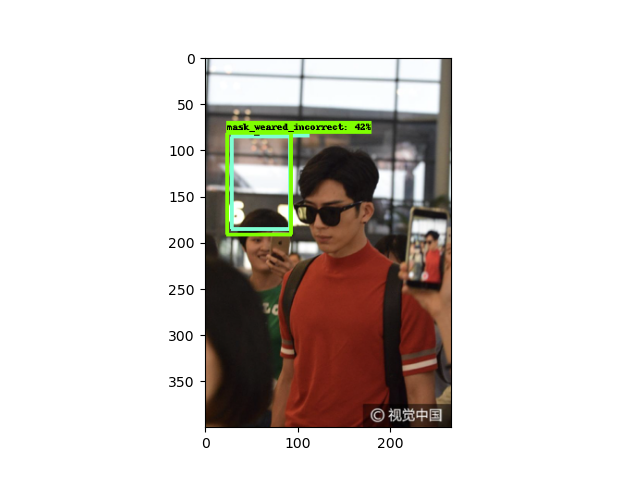

Done


In [20]:
plt.figure()
plt.imshow(image_np_with_detections)
print('Done')
plt.show()